In [1]:
import json
import seaborn as sns
from pathlib import Path
data_root = Path("/home/heh/datasets/Catalan/catalan_data")
filename = "train.json"

manifest_file = data_root / Path(filename)

durations = []
with manifest_file.open("r") as f:
    for line in f:
        datum = json.loads(line)
        durations.append(datum["duration"])


In [16]:
print(f"min duration = {min(durations)}, max duration = {max(durations)}")

min duration = 0.252, max duration = 25.104


/home/heh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

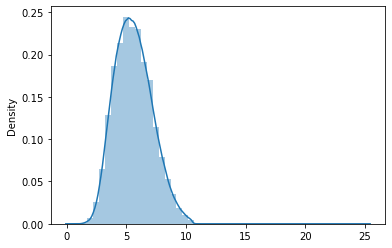

In [4]:
sns.distplot(durations)

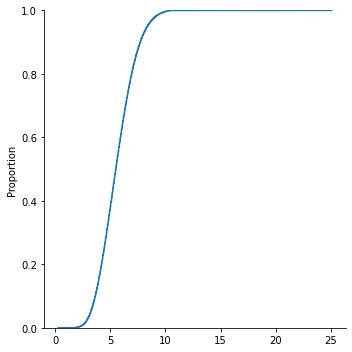

In [8]:
sns.displot(durations,kind="ecdf")

In [20]:
total = len(durations)
upper_bound = 11
lower_bound = 1.0
num_gt = len([x for x in durations if x > upper_bound])
num_le = len([x for x in durations if x < lower_bound])

print(f"Out of {total} samples, {num_gt} samples have duration longer than {upper_bound}")
print(f"Out of {total} samples, {num_le} samples have duration less than {lower_bound}")

Out of 657479 samples, 4 samples have duration longer than 11
Out of 657479 samples, 3 samples have duration less than 1.0


In [22]:
print(sum(durations)/3600, "hours")

1023.7055935292849 hours


In [4]:
def show_stats(filename, upper_bound=11.0, lower_bound=1.0):
    durations = []
    with filename.open("r") as f:
        for line in f:
            datum = json.loads(line)
            durations.append(datum["duration"])
    print("Total hours:", sum(durations)/3600, "hours")
    print(f"Min duration = {min(durations)}, max duration = {max(durations)}")
    total = len(durations)
    num_gt = len([x for x in durations if x > upper_bound])
    num_le = len([x for x in durations if x < lower_bound])

    print(f"Out of {total} samples, {num_gt} samples have duration longer than {upper_bound}")
    print(f"Out of {total} samples, {num_le} samples have duration less than {lower_bound}")
    sns.distplot(durations)
    sns.displot(durations,kind="ecdf")


Total hours: 27.260209410277852 hours
Min duration = 1.44, max duration = 21.48
Out of 16230 samples, 1 samples have duration longer than 11.0
Out of 16230 samples, 0 samples have duration less than 1.0


/home/heh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


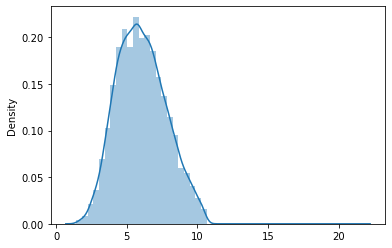

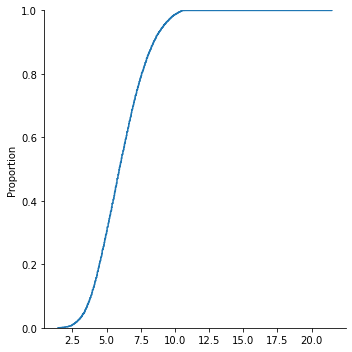

In [6]:
show_stats(data_root / Path("dev.json"))

Total hours: 27.931265659444577 hours
Min duration = 1.56, max duration = 17.928
Out of 16230 samples, 2 samples have duration longer than 11.0
Out of 16230 samples, 0 samples have duration less than 1.0


/home/heh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


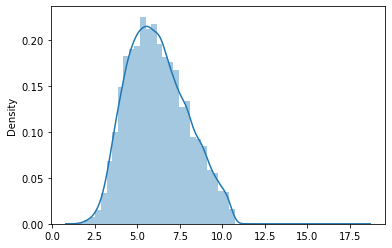

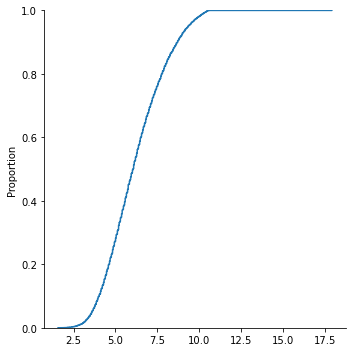

In [7]:
show_stats(data_root / Path("test.json"))

Total hours: 1225.4536673134464 hours
Min duration = 0.252, max duration = 25.104
Out of 803439 samples, 9 samples have duration longer than 11.0
Out of 803439 samples, 20 samples have duration less than 1.0


/home/heh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


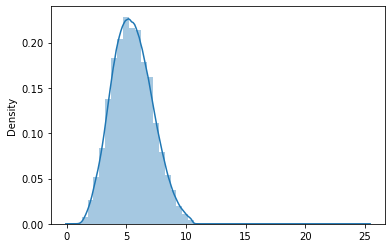

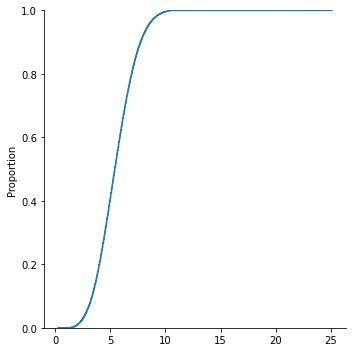

In [9]:
show_stats(data_root / Path("validated_decoded.json"))

In [1]:
import pandas as pd
import os
from pathlib import Path
data_root = Path("/home/heh/datasets/Catalan/catalan_data/")

import json
def load_manifest(filepath):
    data = []
    with filepath.open("r") as f:
        for line in f:
            datum = json.loads(line)
            data.append(datum)
    return data


def save_manifest(data, filepath):
    with Path(filepath).open("w") as f:
        for datum in data:
            line = json.dumps(datum)
            f.write(line + "\n")

def remove_punc(data, punc='!"#$%&()*+,./:;<=>?@[\]^_`{|}~'):
    new_data = []
    for datum in data:
        datum["text"] = datum["text"].translate(str.maketrans("", "", punc))
        new_data.append(datum)
    return new_data

In [1]:
punc = '!"#$%&()*+,./:;<=>?@[\]^_`{|}~'
print(punc)

!"#$%&()*+,./:;<=>?@[\]^_`{|}~


In [10]:
train_file = data_root / Path("train.json")
train_data = load_manifest(train_file)
new_train_data = remove_punc(train_data)

In [14]:
save_manifest(new_train_data, "train_nopunc.json")

In [15]:
val_data  = load_manifest(data_root / Path("dev.json"))
save_manifest(remove_punc(val_data), "dev_nopunc.json")

In [16]:
test_data  = load_manifest(data_root / Path("test.json"))
save_manifest(remove_punc(val_data), "test_nopunc.json")

In [6]:
def move_data(manifest_file: Path, target_dir: Path):
    if not target_dir.is_dir():
        target_dir.mkdir(parents=True)
    
    audio_dir = target_dir / Path("wav")
    if not audio_dir.is_dir():
        audio_dir.mkdir()

    target_file = target_dir / Path(manifest_file.name)
    os.system(f"cp {manifest_file} {target_file}")
    
    cnt = 0
    skip = 0
    data = load_manifest(manifest_file)
    for datum in data:
        audio_file = data_root / Path(datum["audio_filepath"])
        if audio_file.is_file():
            os.system(f"cp {audio_file} {audio_dir / audio_file.name}")
            cnt += 1
        else:
            skip += 1
    print(f"finished copying {cnt} files, skipped {skip} files.")

In [5]:
dev_manifest = data_root / Path("manifest/dev.json")
dev_output_dir = data_root / Path("dev")
move_data(dev_manifest, dev_output_dir)

finished copying 16230 files.


In [7]:
dev_manifest = data_root / Path("manifest/test.json")
dev_output_dir = data_root / Path("test")
move_data(dev_manifest, dev_output_dir)

finished copying 16230 files, skipped 0 files.


In [2]:
train_manifest = data_root / Path("manifest/train.json")
train_data = load_manifest(train_manifest)
print(train_data[0].keys())

dict_keys(['audio_filepath', 'text', 'up_votes', 'down_votes', 'age', 'gender', 'accents', 'client_id', 'duration'])


In [3]:
from collections import Counter
chars = list()
for datum in train_data:
    text = datum["text"]
    for word in text.split():
        for c in word:
            chars.append(c)
 
chars = Counter(chars)
print(chars)


Counter({'a': 4343118, 'e': 4089039, 's': 2745141, 'r': 2470488, 'i': 2312843, 'n': 2202670, 'l': 2189701, 't': 2162700, 'o': 1623913, 'c': 1349804, 'd': 1325204, 'u': 1248712, 'm': 1037481, 'p': 891449, 'v': 525864, 'b': 503538, 'g': 432507, 'f': 335747, "'": 301793, 'q': 261161, 'é': 219986, 'h': 205660, 'x': 164979, 'ó': 156766, 'à': 145964, 'è': 95286, 'j': 93175, 'í': 91525, 'y': 73986, 'ò': 72308, '-': 65192, 'z': 53929, 'ú': 46782, 'ç': 40612, 'k': 22829, '·': 21654, 'w': 16123, 'ï': 15799, 'ü': 10432, 'á': 968, 'ñ': 610, '—': 126, '–': 100, '¿': 82, 'ë': 27, 'ø': 21, 'ô': 19, 'ř': 19, 'ū': 14, 'ã': 11, 'ž': 10, 'ö': 9, 'ı': 8, 'č': 7, 'š': 6, 'ş': 6, 'ù': 4, 'ţ': 4, '¡': 4, 'ä': 3, 'ł': 3, 'å': 3, 'ė': 3, 'ň': 3, 'β': 2, 'ō': 2, '―': 2, 'ć': 2, 'ā': 2, '•': 1, 'ő': 1, 'ℕ': 1, 'ì': 1, 'ℤ': 1, 'ὑ': 1, 'ð': 1})


In [33]:
for c in chars:
    print(c, ":", ascii(c))

ñ : '\xf1'
- : '-'
¿ : '\xbf'
g : 'g'
i : 'i'
ℕ : '\u2115'
x : 'x'
n : 'n'
ć : '\u0107'
β : '\u03b2'
ঃ : '\u0983'
» : '\xbb'
ė : '\u0117'
ং : '\u0982'
o : 'o'
‘ : '\u2018'
ä : '\xe4'
ā : '\u0101'
p : 'p'
ç : '\xe7'
ú : '\xfa'
y : 'y'
• : '\u2022'
ã : '\xe3'
q : 'q'
e : 'e'
ő : '\u0151'
ō : '\u014d'
“ : '\u201c'
á : '\xe1'
č : '\u010d'
ः : '\u0903'
à : '\xe0'
c : 'c'
r : 'r'
’ : '\u2019'
å : '\xe5'
ü : '\xfc'
° : '\xb0'
ı : '\u0131'
š : '\u0161'
ž : '\u017e'
« : '\xab'
… : '\u2026'
ţ : '\u0163'
ł : '\u0142'
ş : '\u015f'
z : 'z'
ó : '\xf3'
· : '\xb7'
– : '\u2013'
ὑ : '\u1f51'
¡ : '\xa1'
u : 'u'
ö : '\xf6'
― : '\u2015'
l : 'l'
ø : '\xf8'
ℤ : '\u2124'
” : '\u201d'
ř : '\u0159'
ð : '\xf0'
í : '\xed'
ù : '\xf9'
è : '\xe8'
w : 'w'
ň : '\u0148'
s : 's'
d : 'd'
ì : '\xec'
ï : '\xef'
j : 'j'
é : '\xe9'
v : 'v'
h : 'h'
f : 'f'
ò : '\xf2'
ū : '\u016b'
m : 'm'
ô : '\xf4'
— : '\u2014'
ë : '\xeb'
b : 'b'
k : 'k'
' : "'"
t : 't'
a : 'a'


In [25]:
print(u"\u00f3", b'\xf3'.encode("utf-8"))

AttributeError: 'bytes' object has no attribute 'encode'

In [53]:
cc=u"\u00f2"
print(cc)
print(ord(cc))
print(ascii(cc))

ò
242
'\xf2'


In [38]:
print("-")
print(u"\u2013")
print(u"\u2014")
print(u"\u2015")



-
–
—
―


In [40]:
u"\xf3" + u"!"

'ó!'

In [7]:
punc2 = u'!"#$%&()*+,./:;<=>?@[\]^_`{|}~'  + u"\u2066" u"\u0903" + u"\u0983" + u"\u00ab" + u"\u00bb" + u"\u0982" + u"\u2018" + u"\u201c" + u"\u201d" + u"\u2019" +u"\u00b0" + u"\u2026"
print(punc2)

!"#$%&()*+,./:;<=>?@[\]^_`{|}~⁦ःঃ«»ং‘“”’°…


In [8]:

def clean_manifest_text(filepath: Path, punc: str):
    outfile = Path(filepath.stem + "_cleaned.json")
    data = load_manifest(filepath)
    new_data = remove_punc(data, punc)
    save_manifest(new_data, outfile)

In [55]:
input_file = data_root / Path("manifest/test.json")
clean_manifest_text(input_file, punc2)


In [12]:
input_file = Path("/home/heh/datasets/Catalan/catalan_data/tarred/s512_b4/bucket4/tarred_audio_manifest.json")
clean_manifest_text(input_file, punc2)

